In [23]:
import numpy as np
import pandas as pd

In [24]:
df = pd.read_csv("salaries.csv")

In [25]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,MI,FT,Data Scientist,120000,USD,120000,AU,0,AU,S
1,2024,MI,FT,Data Scientist,70000,USD,70000,AU,0,AU,S
2,2024,MI,CT,Data Scientist,130000,USD,130000,US,0,US,M
3,2024,MI,CT,Data Scientist,110000,USD,110000,US,0,US,M
4,2024,MI,FT,Data Science Manager,240000,USD,240000,US,0,US,M


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")

In [27]:
df.groupby('work_year').count()

,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
work_year,,,,,,,,,,
2020,75,75,75,75,75,75,75,75,75,75
2021,218,218,218,218,218,218,218,218,218,218
2022,1655,1655,1655,1655,1655,1655,1655,1655,1655,1655
2023,8519,8519,8519,8519,8519,8519,8519,8519,8519,8519
2024,6027,6027,6027,6027,6027,6027,6027,6027,6027,6027


In [28]:
df['work_year'].unique()

array([2024, 2022, 2023, 2020, 2021], dtype=int64)

In [29]:
number = df['work_year'].value_counts()

In [30]:
number

work_year
2023    8519
2024    6027
2022    1655
2021     218
2020      75
Name: count, dtype: int64

In [31]:
avg = df.groupby('work_year').describe()['salary_in_usd']['mean']

In [32]:
df['job_title'].nunique()

155

In [33]:
avg

work_year
2020    102250.866667
2021     99922.073394
2022    134349.500906
2023    153732.664632
2024    150643.254853
Name: mean, dtype: float64

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16494 entries, 0 to 16493
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           16494 non-null  int64 
 1   experience_level    16494 non-null  object
 2   employment_type     16494 non-null  object
 3   job_title           16494 non-null  object
 4   salary              16494 non-null  int64 
 5   salary_currency     16494 non-null  object
 6   salary_in_usd       16494 non-null  int64 
 7   employee_residence  16494 non-null  object
 8   remote_ratio        16494 non-null  int64 
 9   company_location    16494 non-null  object
 10  company_size        16494 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.4+ MB


In [35]:
main_table = df.groupby('work_year').agg({'salary_in_usd': ['count', 'mean']}).reset_index()
main_table.columns = ['Year', 'Number of total jobs for that year', 'Average salary in USD']

In [36]:
main_table.head()

,Year,Number of total jobs for that year,Average salary in USD
0,2020,75,102250.866667
1,2021,218,99922.073394
2,2022,1655,134349.500906
3,2023,8519,153732.664632
4,2024,6027,150643.254853


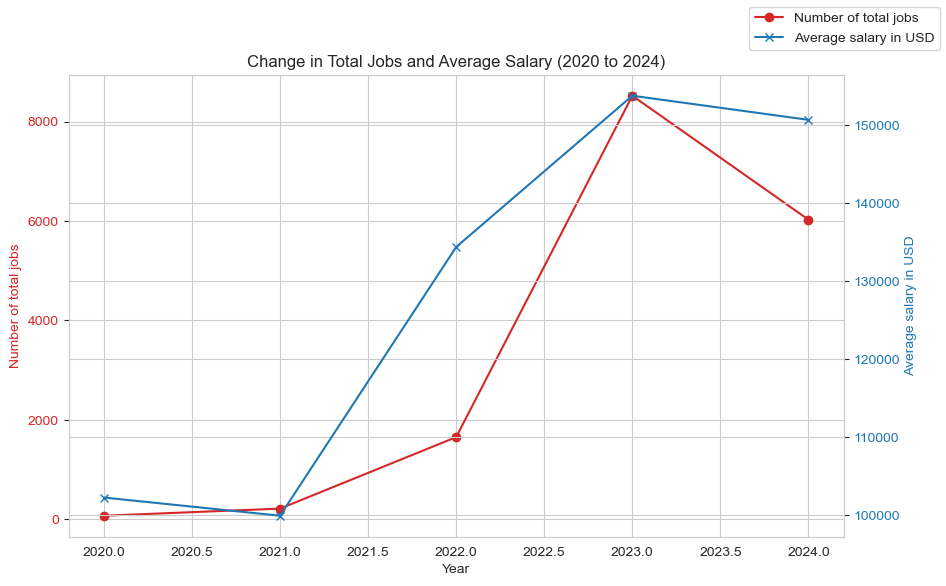

In [37]:
import matplotlib.pyplot as plt
years = main_table['Year']
total_jobs = main_table['Number of total jobs for that year']
avg_salary = main_table['Average salary in USD']


fig, ax1 = plt.subplots(figsize=(10, 6))


color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of total jobs', color=color)
ax1.plot(years, total_jobs, color=color, marker='o', label='Number of total jobs')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Average salary in USD', color=color)
ax2.plot(years, avg_salary, color=color, marker='x', label='Average salary in USD')
ax2.tick_params(axis='y', labelcolor=color)


plt.title('Change in Total Jobs and Average Salary (2020 to 2024)')

fig.legend()
plt.show()


In [66]:
year_data = df[df['work_year'] == 2023]
second_data = year_data.groupby('job_title').size().reset_index(name='Count')

In [67]:
second_data

,job_title,Count
0,AI Architect,12
1,AI Developer,17
2,AI Engineer,47
3,AI Product Manager,1
4,AI Programmer,5
...,...,...
112,Research Analyst,57
113,Research Engineer,164
114,Research Scientist,286
115,Software Data Engineer,3


In [40]:
def jobsCountperYear(year):
    year_data = df[df['work_year'] == year]
    second_data = year_data.groupby('job_title').size().reset_index(name='Count')
    return second_data

In [41]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [42]:
import cufflinks as cf

In [43]:
init_notebook_mode(connected=True)
cf.go_offline()

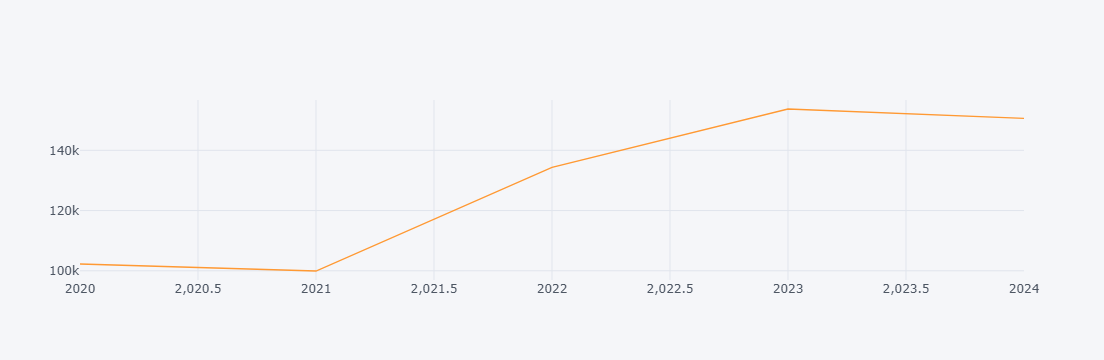

In [54]:
main_table.iplot(x='Year',y='Average salary in USD')

In [62]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import iplot
import pandas as pd

In [63]:
trace1 = go.Scatter(
    x=main_table['Year'],
    y=main_table['Number of total jobs for that year'],
    mode='lines',
    name='Number of total jobs for that year',
    yaxis='y1'
)

trace2 = go.Scatter(
    x=main_table['Year'],
    y=main_table['Average salary in USD'],
    mode='lines',
    name='Average salary in USD',
    yaxis='y2'
)


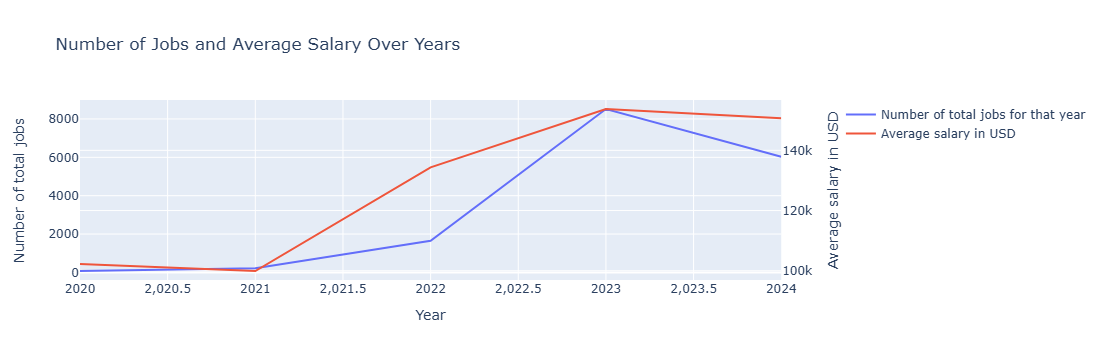

In [64]:
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(trace1, secondary_y=False)
fig.add_trace(trace2, secondary_y=True)


fig.update_layout(
    title='Number of Jobs and Average Salary Over Years',
    xaxis_title='Year',
    yaxis=dict(
        title='Number of total jobs'
    ),
    yaxis2=dict(
        title='Average salary in USD',
        overlaying='y',
        side='right'
    )
)


iplot(fig)